# Linear Algebra in julia (Book chapters 2.2 - 2.8)

<b> Vector and matrices (LinearAlgebra package)</b>

Definition of matrices: Use space for horozontal concatenation, semicolon for vertical concatenation, and ' for transpose (like Matlab)

In [1]:
using LinearAlgebra

A=[1 2 3; -4 3 2; 0 1 0]

3×3 Matrix{Int64}:
  1  2  3
 -4  3  2
  0  1  0

In [2]:
print("A is of type ", typeof(A), ", contains ", length(A), " elements in total. Number of rows: ",
    size(A)[1], ", number of columns: ", size(A)[2] )

A is of type Matrix{Int64}, contains 9 elements in total. Number of rows: 3, number of columns: 3

Define a row matrix:

In [3]:
B_row=[1+im 1 1]

1×3 Matrix{Complex{Int64}}:
 1+1im  1+0im  1+0im

Conjugate transpose:

In [4]:
B_column=B_row'

3×1 adjoint(::Matrix{Complex{Int64}}) with eltype Complex{Int64}:
 1 - 1im
 1 + 0im
 1 + 0im

Concatenate column matrix to the right of matrix A:

In [5]:
C=[A B_column]

3×4 Matrix{Complex{Int64}}:
  1+0im  2+0im  3+0im  1-1im
 -4+0im  3+0im  2+0im  1+0im
  0+0im  1+0im  0+0im  1+0im

In [6]:
print("Matrix C has ", length(C), " elements in total. Number of rows: ",
    size(C)[1], ", number of columns: ", size(C)[2] )

Matrix C has 12 elements in total. Number of rows: 3, number of columns: 4

Concatenate row matrix to the top of A:

In [7]:
D=[B_row ; A]

4×3 Matrix{Complex{Int64}}:
  1+1im  1+0im  1+0im
  1+0im  2+0im  3+0im
 -4+0im  3+0im  2+0im
  0+0im  1+0im  0+0im

In [8]:
print("Matrix D has ", length(D), " elements in total. Number of rows: ",
    size(D)[1], ", number of columns: ", size(D)[2] )

Matrix D has 12 elements in total. Number of rows: 4, number of columns: 3

Convert range to vector:

In [9]:
r=1:10
vr=collect(r)
print("Type of r is ", typeof(r), ", type of vr is ", typeof(vr), ", elements are ", collect(r)) 

Type of r is UnitRange{Int64}, type of vr is Vector{Int64}, elements are [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

Compare performance between range and vector:

In [10]:
import Pkg
Pkg.add("BenchmarkTools")
using BenchmarkTools

┌ Error: curl_easy_setopt: 4
└ @ Downloads.Curl C:\Users\jjcun\.julia\juliaup\julia-1.10.8+0.x64.w64.mingw32\share\julia\stdlib\v1.10\Downloads\src\Curl\utils.jl:50
   Resolving package versions...
  No Changes to `C:\Users\jjcun\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\jjcun\.julia\environments\v1.10\Manifest.toml`


In [11]:
@btime sum($(1:1_000_000))

  3.203 ns (0 allocations: 0 bytes)


500000500000

In [12]:
v=collect(1:1_000_000)
@btime sum($(v))

  225.000 μs (0 allocations: 0 bytes)

500000500000

Generate special vectors matrices/vectors (Zeros, Ones, Identity) just like in Matlab:

In [13]:
zero_m=zeros(2,3)

2×3 Matrix{Float64}:
 0.0  0.0  0.0
 0.0  0.0  0.0

In [14]:
one_m=ones(2,3)

2×3 Matrix{Float64}:
 1.0  1.0  1.0
 1.0  1.0  1.0

In [15]:
Id=Matrix{Float64}(I, 3, 3)

3×3 Matrix{Float64}:
 1.0  0.0  0.0
 0.0  1.0  0.0
 0.0  0.0  1.0

Random matrix with entries between 0 and 1:

In [16]:
rand(3,2)

3×2 Matrix{Float64}:
 0.652731   0.196911
 0.0512841  0.980359
 0.940684   0.911931

Define sub(super)-diagonal matrices:

In [17]:
#Defines diagonal matrix

one_v=ones(3) #Define vector of 1s (row or column matrix would not work!)
Id3=diagm(one_v)

3×3 Matrix{Float64}:
 1.0  0.0  0.0
 0.0  1.0  0.0
 0.0  0.0  1.0

In [18]:
#Super-diagonal matrix
Super3=diagm(1 => one_v)


4×4 Matrix{Float64}:
 0.0  1.0  0.0  0.0
 0.0  0.0  1.0  0.0
 0.0  0.0  0.0  1.0
 0.0  0.0  0.0  0.0

In [19]:
#Subdiagonal matrix
Sub3=diagm(-1 => one_v)

4×4 Matrix{Float64}:
 0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0
 0.0  0.0  1.0  0.0

Matrix operations: Multiplication, power, inverse, ...

In [20]:
#Matrix matrix multiplication
Sub3*Super3

4×4 Matrix{Float64}:
 0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0
 0.0  0.0  1.0  0.0
 0.0  0.0  0.0  1.0

In [21]:
Super3*Sub3

4×4 Matrix{Float64}:
 1.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0
 0.0  0.0  1.0  0.0
 0.0  0.0  0.0  0.0

In [22]:
#Elementwise multiplication
Super3.*Sub3

4×4 Matrix{Float64}:
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0

In [23]:
#Scalar times matrix
Two3=2*Id3

3×3 Matrix{Float64}:
 2.0  0.0  0.0
 0.0  2.0  0.0
 0.0  0.0  2.0

In [24]:
#Inverse (Do not use this for solution of linear equations!)
inv(Two3)

3×3 Matrix{Float64}:
 0.5  0.0  0.0
 0.0  0.5  0.0
 0.0  0.0  0.5

In [25]:
#Rank of matrix
print("Size of matrix:",size(Two3), ", rank = ", rank(Two3))

Size of matrix:(3, 3), rank = 3

In [26]:
#Power of superdiagonal matrix
Super3^2

4×4 Matrix{Float64}:
 0.0  0.0  1.0  0.0
 0.0  0.0  0.0  1.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0

In [27]:
Super3^3

4×4 Matrix{Float64}:
 0.0  0.0  0.0  1.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0

In [28]:
Super3^4

4×4 Matrix{Float64}:
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0

In [29]:

print("Determinant of superdiagonal matrix is ",  det(Super3), ". For an identity matrix it is ", det(Id3) )

Determinant of superdiagonal matrix is 0.0. For an identity matrix it is 1.0

Solving system of linear equations $Ax=b$:

In [30]:
A=[ 1 0 -1 1; 2 2 1 2; -1 -3 0 1; 2 0 0 -1]

4×4 Matrix{Int64}:
  1   0  -1   1
  2   2   1   2
 -1  -3   0   1
  2   0   0  -1

In [31]:
#Define RHS vector (vector not row matrix!)
b=[1; 2; 3;4]

4-element Vector{Int64}:
 1
 2
 3
 4

In [32]:
# Equation Ax=b, Solve for x (like Matlab):
x=A\b

4-element Vector{Float64}:
  2.0344827586206895
 -1.6551724137931032
  1.103448275862069
  0.06896551724137934

<b> In-class exercise: </b> Verify that x indeed solves $Ax=b$:

<b>In class exercise:</b> Use inverse of A to solve the same system of equations: 

In [33]:
#What happens for a singular matrix
x=Super3\b

LoadError: SingularException(4)

<b> Matrix/vector norms and stability </b>

Integrated julia function for evaluating the Froebenius norm (Euclidean norm for vectors) $\sqrt{\sum_{i,j} A_{ij}^2}$: 

In [34]:
norm(Id3)#sqrt(1+1+1)

1.7320508075688772

In [35]:
norm([3,4])#sqrt(3^2+4^2)

5.0

Effect of induced matrix norm on vectors  (Book example 2.7.7)

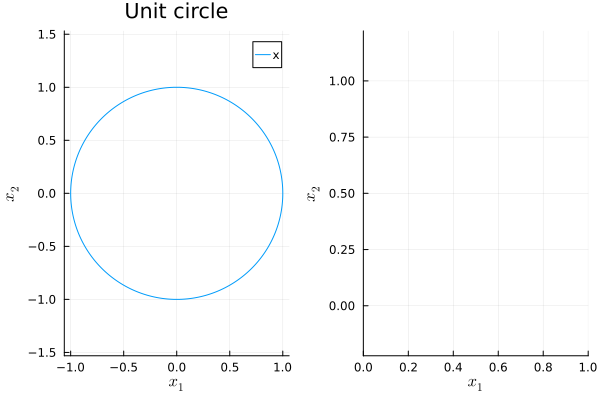

In [36]:
#Visualization example for matrix norm
using Plots, LaTeXStrings

theta=2pi*(0:1/600:1)

x=[fun(t) for fun in [cos, sin], t in theta]#Generate array of 2D coordinates on unit circle

plot(aspect_ratio=1,layout=(1,2),xlabel=L"x_1",ylabel=L"x_2")
plot!(x[1,:],x[2,:],label="x",subplot=1, title="Unit circle")


 Define the matrix and calculate its norms for $\mathbf{A}=\begin{bmatrix}2 & 0 \\1 & -1 \end{bmatrix}$: 

In [37]:
A=[2 0 ;1 -1]
println("Froebenius norm of A is ", norm(A))
println("Induced matrix 2-norm of A is ", opnorm(A))

Froebenius norm of A is 2.449489742783178
Induced matrix 2-norm of A is 2.2882456112707374


Visualize effect of transformation on unit circle via <b>A</b>

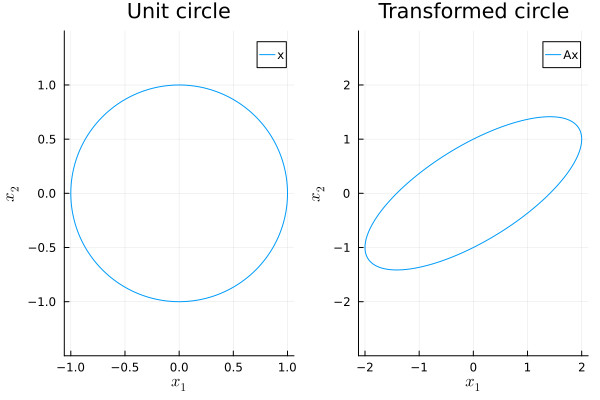

In [38]:
y=A*x;
#
plot!(y[1,:],y[2,:],label="Ax",subplot=2, title="Transformed circle")

Froebenius matrix norm: $||A||_F=\sqrt{\sum_{i,j} A_{ij}^2}$

Induced vector Euclidean 2-norm: $||A||_2=\sup_{\mathbf{x} \in \mathbb{R}^n} \frac{||A\cdot \mathbf{x}||_2}{||\mathbf{x}||_2} $

Both norms are equivalent on $n$ dimensions!

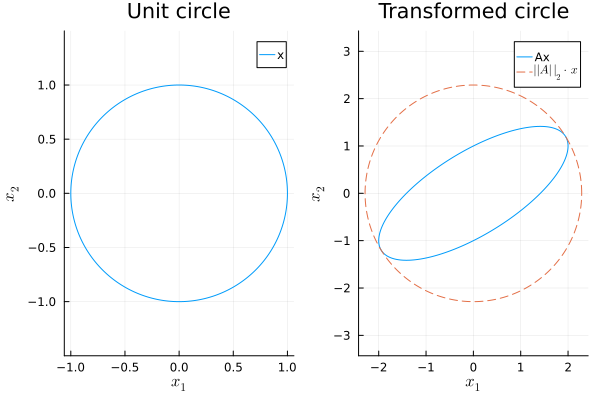

In [39]:
#Induced operator norm
norm_ind=opnorm(A)
plot!(norm_ind*x[1,:],norm_ind*x[2,:],label=L"||A||_2\cdot x",subplot=2,l=:dash)

<b>Condition number</b> of matrix A: cond(A)=$||A|| \cdot ||A^{-1}||$

In [40]:
cond(Id3)#Identiy matrix is well-conditioned

1.0

In [41]:
cond(Super3)#Singular matrix

Inf

<b>Example</b>: Hilbert matrices (Demo 2.8.3)

In [42]:
#Hilbert matrices
A=[1/(i+j) for i in 1:6, j in 1:6]

6×6 Matrix{Float64}:
 0.5       0.333333  0.25      0.2       0.166667   0.142857
 0.333333  0.25      0.2       0.166667  0.142857   0.125
 0.25      0.2       0.166667  0.142857  0.125      0.111111
 0.2       0.166667  0.142857  0.125     0.111111   0.1
 0.166667  0.142857  0.125     0.111111  0.1        0.0909091
 0.142857  0.125     0.111111  0.1       0.0909091  0.0833333

In [43]:
cond(A)

5.109816296603598e7

<b> How do tiny random perturbations affect the solutions to the linear system of equations? </b>

In [44]:
#Generate solution vector and RHS
x=1:6 #original solution (1,2,3,4,5,6)
b=A*x

6-element Vector{Float64}:
 4.407142857142857
 3.564285714285714
 3.013095238095238
 2.6174603174603175
 2.317279942279942
 2.0807359307359308

<b>In-class exercise: </b> Perturb the original matrix $\mathbf{A}$ by random noise of magnitude $10^{-10}, 10^{-9},10^{-8}, 10^{-7}$ and calculate the solution to perturbed matrix:

In [45]:
#generate random perturbations to matrix A and RHS b
noise=1e-10
deltaA=noise*randn(size(A));
deltab=noise*randn(size(b));

NewA=A+deltaA;
Newb=b+deltab;

In [46]:
#Solve using the perturbed system
Newx=NewA\b;
print("The original solution is x = ", collect(x), ". The solution perturbed by noise ", noise, " is ", Newx)

The original solution is x = [1, 2, 3, 4, 5, 6]. The solution perturbed by noise 1.0e-10 is [1.0000739246030161, 1.9987522203809396, 3.0064933707921058, 3.9856500251158793, 5.014153402626932, 5.994867006580769]

<b> LU factorization</b> (Book demo 2.6.3)

In [47]:
A=[2 0 4 3; -2 0 2 -13; 1 15 2 -4.5; -4 5 -7 -10 ]

4×4 Matrix{Float64}:
  2.0   0.0   4.0    3.0
 -2.0   0.0   2.0  -13.0
  1.0  15.0   2.0   -4.5
 -4.0   5.0  -7.0  -10.0

In [48]:
L,U,p=lu(A) #L, U factors and row permutation p

LU{Float64, Matrix{Float64}, Vector{Int64}}
L factor:
4×4 Matrix{Float64}:
  1.0    0.0       0.0        0.0
 -0.25   1.0       0.0        0.0
  0.5   -0.153846  1.0        0.0
 -0.5    0.153846  0.0833333  1.0
U factor:
4×4 Matrix{Float64}:
 -4.0   5.0   -7.0      -10.0
  0.0  16.25   0.25      -7.0
  0.0   0.0    5.53846   -9.07692
  0.0   0.0    0.0       -0.166667

Verify that the product of the factors L, U equals the original matrix A (up to a permutation of rows):

In [49]:
A_p=L*U

4×4 Matrix{Float64}:
 -4.0   5.0  -7.0  -10.0
  1.0  15.0   2.0   -4.5
 -2.0   0.0   2.0  -13.0
  2.0   0.0   4.0    3.0

In [50]:
A[p,:]

4×4 Matrix{Float64}:
 -4.0   5.0  -7.0  -10.0
  1.0  15.0   2.0   -4.5
 -2.0   0.0   2.0  -13.0
  2.0   0.0   4.0    3.0

In [51]:
Asing=[1 1 1; 0 0 -1; 0 0 5 ] #singular U matrix

3×3 Matrix{Int64}:
 1  1   1
 0  0  -1
 0  0   5

In [52]:
lu(Asing)

LoadError: SingularException(2)

<b>Cholesky factorization</b>:

In [53]:
#Generate tridiagonal matrix for the discretized Laplacian operator

n=6;
one_vn=ones(n)
one_vn1=ones(n-1)
Supern=diagm(1 => one_vn1)
Subn=diagm(-1=>one_vn1)
Diagn=diagm(one_vn)
Tridiagn=2*Diagn-Supern-Subn

6×6 Matrix{Float64}:
  2.0  -1.0   0.0   0.0   0.0   0.0
 -1.0   2.0  -1.0   0.0   0.0   0.0
  0.0  -1.0   2.0  -1.0   0.0   0.0
  0.0   0.0  -1.0   2.0  -1.0   0.0
  0.0   0.0   0.0  -1.0   2.0  -1.0
  0.0   0.0   0.0   0.0  -1.0   2.0

In [54]:
chl=cholesky(Tridiagn)

Cholesky{Float64, Matrix{Float64}}
U factor:
6×6 UpperTriangular{Float64, Matrix{Float64}}:
 1.41421  -0.707107   0.0        0.0        0.0        0.0
  ⋅        1.22474   -0.816497   0.0        0.0        0.0
  ⋅         ⋅         1.1547    -0.866025   0.0        0.0
  ⋅         ⋅          ⋅         1.11803   -0.894427   0.0
  ⋅         ⋅          ⋅          ⋅         1.09545   -0.912871
  ⋅         ⋅          ⋅          ⋅          ⋅         1.08012

In [55]:
U_factor=chl.U

6×6 UpperTriangular{Float64, Matrix{Float64}}:
 1.41421  -0.707107   0.0        0.0        0.0        0.0
  ⋅        1.22474   -0.816497   0.0        0.0        0.0
  ⋅         ⋅         1.1547    -0.866025   0.0        0.0
  ⋅         ⋅          ⋅         1.11803   -0.894427   0.0
  ⋅         ⋅          ⋅          ⋅         1.09545   -0.912871
  ⋅         ⋅          ⋅          ⋅          ⋅         1.08012

Verify that the product of U with its transpose is the original matrix:

In [56]:
U_factor'*U_factor

6×6 Matrix{Float64}:
  2.0  -1.0   0.0   0.0   0.0   0.0
 -1.0   2.0  -1.0   0.0   0.0   0.0
  0.0  -1.0   2.0  -1.0   0.0   0.0
  0.0   0.0  -1.0   2.0  -1.0   0.0
  0.0   0.0   0.0  -1.0   2.0  -1.0
  0.0   0.0   0.0   0.0  -1.0   2.0

<b> In-class exercise: </b> Write a function that solves a linear system of equations $\mathbf{A}\cdot \mathbf{x}=\mathbf{b}$ with the help of LU decomposition. <b>Do not use the in-built solver</b> $\mathbf{A} \backslash \mathbf{b}$ !

In [58]:
function solve_lu(A, b)
    # LU decomposition with partial pivoting
    L, U, P = lu(A)  # P is the permutation matrix
    
    # Forward substitution to solve L * y = P * b
    y = forward_substitution(L, P * b)

    # Backward substitution to solve U * x = y
    x = backward_substitution(U, y)

    return x
end

# Forward substitution for lower triangular matrix
function forward_substitution(L::Matrix{Float64}, b::Vector{Float64})
    n = length(b)
    y = zeros(n)
    for i in 1:n
        y[i] = (b[i] - sum(L[i, j] * y[j] for j in 1:i-1)) / L[i, i]
    end
    return y
end

# Backward substitution for upper triangular matrix
function backward_substitution(U::Matrix{Float64}, y::Vector{Float64})
    n = length(y)
    x = zeros(n)
    for i in n:-1:1
        x[i] = (y[i] - sum(U[i, j] * x[j] for j in i+1:n)) / U[i, i]
    end
    return x
end

# Example usage
A = [2.0 1.0 -1.0; -3.0 -1.0 2.0; -2.0 1.0 2.0]
b = [8.0; -11.0; -3.0]
x = solve_lu(A, b)
println("Solution: ", x)


LoadError: MethodError: no method matching *(::Vector{Int64}, ::Vector{Float64})

[0mClosest candidates are:
[0m  *(::Any, ::Any, [91m::Any[39m, [91m::Any...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4moperators.jl:587[24m[39m
[0m  *([91m::Adjoint{<:Any, <:SparseArrays.CHOLMOD.Sparse}[39m, ::VecOrMat)
[0m[90m   @[39m [32mSparseArrays[39m [90mC:\Users\jjcun\.julia\juliaup\julia-1.10.8+0.x64.w64.mingw32\share\julia\stdlib\v1.10\SparseArrays\src\solvers\[39m[90m[4mcholmod.jl:1253[24m[39m
[0m  *([91m::Adjoint{<:Number, <:AbstractVector}[39m, ::AbstractVector{<:Number})
[0m[90m   @[39m [35mLinearAlgebra[39m [90mC:\Users\jjcun\.julia\juliaup\julia-1.10.8+0.x64.w64.mingw32\share\julia\stdlib\v1.10\LinearAlgebra\src\[39m[90m[4madjtrans.jl:462[24m[39m
[0m  ...
